<a href="https://colab.research.google.com/github/YangHyunu/SKT-FLY-AI-5/blob/main/1%EC%A3%BC%EC%B0%A8/4%EC%9D%BC_07_bin_svm_diabets!!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SVM 이진분류
- 피마 인디언 당뇨병 예측 데이터셋을 이용해서 이진분류 실시


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SEED=123

## 데이터 준비

In [ ]:
! wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/diabetes.csv

--2024-06-27 23:59:12--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2024-06-27 23:59:12 (90.5 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df = diabetes.copy()

In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info() # Outcome 이미 인코딩 돼어있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe() # 혈압, 혈관두께, 인슐린, BMI의 최솟값이 0 이라는게 비 상식 전처리 필요 !

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 범주형 변수

In [ ]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

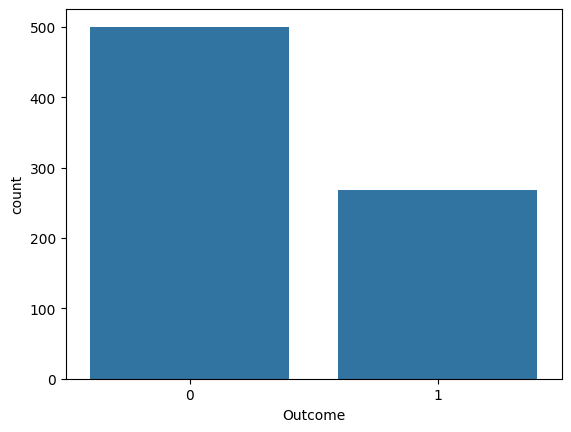

In [ ]:
sns.countplot(data=df,x='Outcome')

## 연속형 변수

In [ ]:
tmp=df['Pregnancies'].sort_values(ascending=False)
tmp= tmp.reset_index()

<Axes: xlabel='Pregnancies', ylabel='count'>

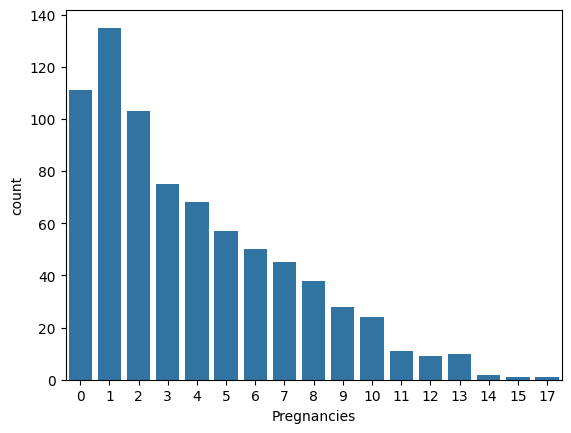

In [ ]:
sns.countplot(data=tmp,x='Pregnancies')

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

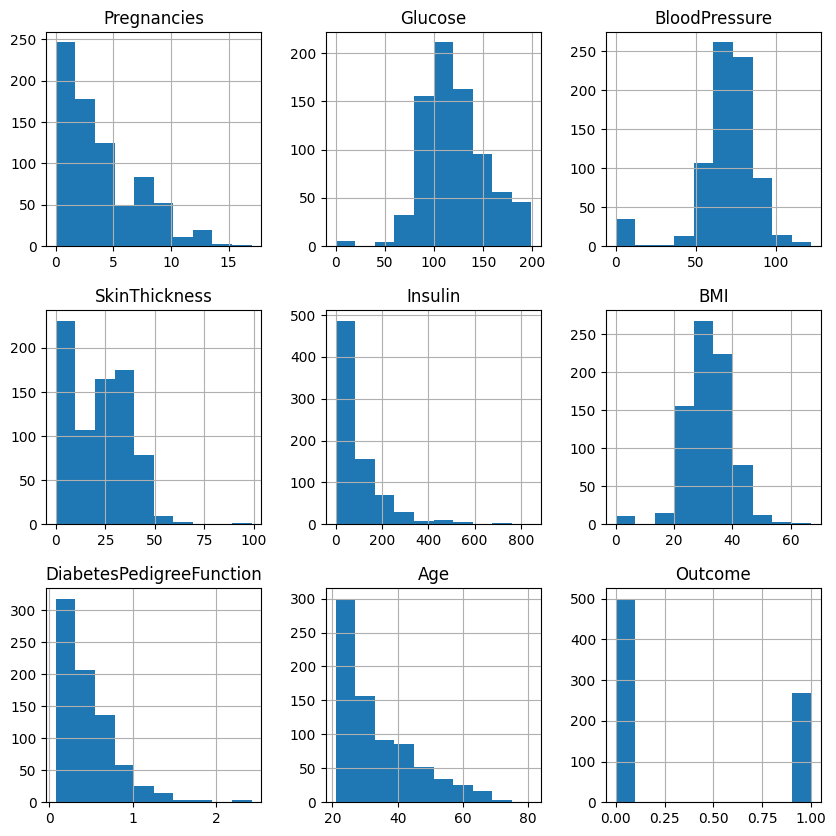

In [ ]:
df.hist(figsize=(10,10))

In [ ]:
## 중복값

In [ ]:
df.duplicated().sum()

0

In [ ]:
## 이상치 ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] 이상치 전 처리는 데이터 분리 이후에.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 트레인, 테스트 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
train,test =train_test_split(df,test_size=0.1,shuffle=True,random_state=SEED,stratify=df['Outcome'])
train.shape, test.shape

((691, 9), (77, 9))

In [ ]:
train['Outcome'].value_counts()

Outcome
0    450
1    241
Name: count, dtype: int64

In [ ]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
63,2,141,58,34,128,25.4,0.699,24,0
510,12,84,72,31,0,29.7,0.297,46,1
422,0,102,64,46,78,40.6,0.496,21,0
637,2,94,76,18,66,31.6,0.649,23,0
440,0,189,104,25,0,34.3,0.435,41,1


### X,y 변수 분리

In [ ]:
X_train=train.drop('Outcome',axis=1)
y_train=train['Outcome']
X_train.shape, y_train.shape

((691, 8), (691,))

#  이상치 0인값을 특정값(중위값)으로 치환하기
 ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [ ]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
median_list=[]
col_list=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for col in col_list:
  med = X_train[col].median()
  X_train.loc[X_train[col]==0,col] = med
  median_list.append(med)

In [ ]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,3.846599,121.903039,72.410999,27.290883,90.282200,32.424168,0.473954,33.247467
std,3.396447,30.514394,11.963548,9.280221,107.084593,6.944524,0.331136,11.873407
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,23.000000,23.000000,27.500000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,23.000000,32.000000,0.375000,29.000000
75%,6.000000,141.000000,80.000000,32.000000,126.500000,36.500000,0.629500,41.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
X_train.shape

(691, 8)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_train_s

y_train_e=y_train.to_numpy()

In [ ]:
from sklearn.svm import SVC
clf = SVC(random_state=SEED)
clf.fit(X_train_s,y_train_e)

SVC(random_state=123)

In [ ]:
# 테스트 값 전철

In [ ]:
X_test = test.drop('Outcome',axis=1)
y_test = test['Outcome']
X_test.shape,y_test.shape

((77, 8), (77,))

In [ ]:
col_list=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for i, col in enumerate(col_list):
  X_test.loc[X_test[col]==0,col] = median_list[i]
  median_list.append(med)


In [ ]:
X_test_s =ss.fit_transform(X_test)
X_test_s
y_test_e = y_test.to_numpy()

In [ ]:
y_pred = clf.predict(X_test_s)

In [ ]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true,y_pred,aver='binary'):
  print('accuracy',accuracy_score(y_true,y_pred))
  print('recall',recall_score(y_true,y_pred,average=aver))
  print('precision',precision_score(y_true,y_pred,average=aver))
  print('f1_score',f1_score(y_true,y_pred, average=aver))

  cfm = confusion_matrix(y_true,y_pred)
  s = sns.heatmap(cfm,annot=True,cmap='Blues',fmt='d',cbar=False)
  s.set(xlabel='Actual',ylabel='Prediction')
  plt.show()

accuracy 0.7922077922077922
recall 0.6296296296296297
precision 0.7391304347826086
f1_score 0.68


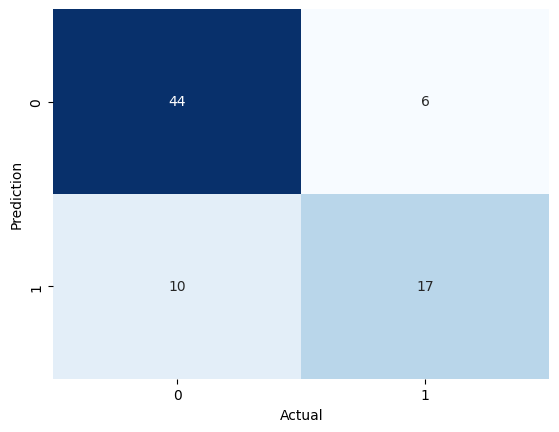

In [ ]:
print_metrics(y_test_e,y_pred)

TypeError: 'float' object cannot be interpreted as an integer

# 모델 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV
params_grid={'C':[0.001,0.01,0.1,1,10],'gamma':[0.001, 0.01, 0.1, 1, 10],'kernel':['rbf','poly'],'degree':[2,3]}
clf = SVC(random_state=42)
grid_search=GridSearchCV(estimator=clf,param_grid=params_grid,cv=3,
                         n_jobs= -1,refit=True,return_train_score=True)
grid_search.fit(X_train_s,y_train_e)

GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.2, 0.3, 2, 5, 10], 'degree': [2, 3],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'poly']},
             return_train_score=True)

In [ ]:
grid_search.best_estimator_

SVC(C=2, degree=2, gamma=0.1, random_state=42)

In [ ]:
grid_search.best_params_

{'C': 2, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
y_pred=grid_search.best_estimator_.predict(X_test_s)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0])

accuracy 0.8051948051948052
recall 0.6296296296296297
precision 0.7727272727272727
f1_score 0.6938775510204083


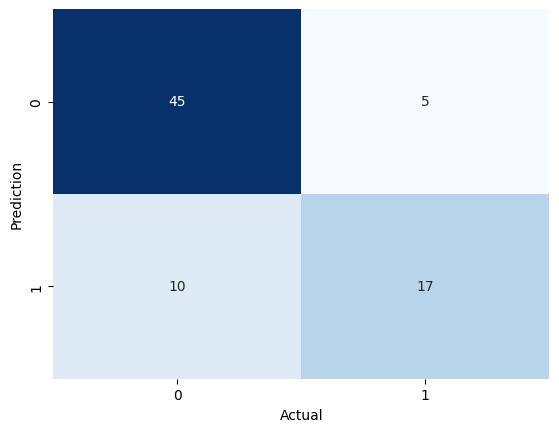

In [ ]:
print_metrics(y_test_e,y_pred)